In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE

from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Full - Binary Classification

In [2]:
df = pd.read_csv('./Data/BINARY-DF.csv', index_col='PetID') # Classifications for generic DF with isPetAdopted as the target
smote = SMOTE(sampling_strategy=0.8, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
X, y = df.drop(columns='isPetAdopted'), df['isPetAdopted']


foldScores = {}

### Decision Tree

In [4]:
dtree = tree.DecisionTreeClassifier(random_state=42)

dtree_param_grid = {
    'max_depth': [3,5,10,15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}

f1_scores = []
accuracy_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    print(f"Starting Decision Tree # {fold + 1}.")
    grid_search = GridSearchCV(estimator=dtree, param_grid=dtree_param_grid, cv=3, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_dtree = grid_search.best_estimator_
    y_pred_val = best_dtree.predict(X_val)

    f1 = f1_score(y_val, y_pred_val, average='weighted')  # Use 'weighted' or adjust based on your data
    accuracy = accuracy_score(y_val, y_pred_val)

    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

foldScores['DTree'] = {
    'F1-deviation': np.std(f1_scores),
    'F1-average': np.mean(f1_scores),
    'Accuracy-average': np.mean(accuracy_scores)
}
# Get Classification Report and Confusion Matrix only of last Fold
print(classification_report(y_val, y_pred_val))
print(confusion_matrix(y_val, y_pred_val))

Starting Decision Tree # 1.
Starting Decision Tree # 2.
Starting Decision Tree # 3.
Starting Decision Tree # 4.
Starting Decision Tree # 5.
              precision    recall  f1-score   support

       False       0.46      0.58      0.51       739
        True       0.83      0.75      0.79      2004

    accuracy                           0.70      2743
   macro avg       0.65      0.67      0.65      2743
weighted avg       0.73      0.70      0.71      2743

[[ 430  309]
 [ 501 1503]]


### Random Forest

In [6]:
rforest = RandomForestClassifier(random_state=42)

param_grid = {
    'max_depth': [3,5,10,15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}

f1_scores = []
accuracy_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    print(f"Starting Decision Tree # {fold + 1}.")
    grid_search = GridSearchCV(estimator=rforest, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_rforest = grid_search.best_estimator_
    y_pred_val = best_rforest.predict(X_val)

    f1 = f1_score(y_val, y_pred_val, average='weighted')  # Use 'weighted' or adjust based on your data
    accuracy = accuracy_score(y_val, y_pred_val)

    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

foldScores['RForest'] = {
    'F1-deviation': np.std(f1_scores),
    'F1-average': np.mean(f1_scores),
    'Accuracy-average': np.mean(accuracy_scores)
}
# Get Classification Report and Confusion Matrix only of last Fold
print(classification_report(y_val, y_pred_val))
print(confusion_matrix(y_val, y_pred_val))

Starting Decision Tree # 1.
Starting Decision Tree # 2.
Starting Decision Tree # 3.
Starting Decision Tree # 4.
Starting Decision Tree # 5.
              precision    recall  f1-score   support

       False       0.52      0.50      0.51       739
        True       0.82      0.83      0.82      2004

    accuracy                           0.74      2743
   macro avg       0.67      0.66      0.67      2743
weighted avg       0.74      0.74      0.74      2743

[[ 369  370]
 [ 344 1660]]


### Bayes

In [7]:
bayes = GaussianNB()
param_grid = {}

f1_scores = []
accuracy_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    print(f"Starting Bayes # {fold + 1}.")
    grid_search = GridSearchCV(estimator=bayes, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_bayes = grid_search.best_estimator_
    y_pred_val = best_bayes.predict(X_val)

    f1 = f1_score(y_val, y_pred_val, average='weighted')  # Use 'weighted' or adjust based on your data
    accuracy = accuracy_score(y_val, y_pred_val)

    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

foldScores['Bayes'] = {
    'F1-deviation': np.std(f1_scores),
    'F1-average': np.mean(f1_scores),
    'Accuracy-average': np.mean(accuracy_scores)
}
# Get Classification Report and Confusion Matrix only of last Fold
print(classification_report(y_val, y_pred_val))
print(confusion_matrix(y_val, y_pred_val))

Starting Bayes # 1.
Starting Bayes # 2.
Starting Bayes # 3.
Starting Bayes # 4.
Starting Bayes # 5.
              precision    recall  f1-score   support

       False       0.34      0.60      0.44       739
        True       0.80      0.57      0.66      2004

    accuracy                           0.58      2743
   macro avg       0.57      0.59      0.55      2743
weighted avg       0.67      0.58      0.60      2743

[[ 447  292]
 [ 862 1142]]


### KNN

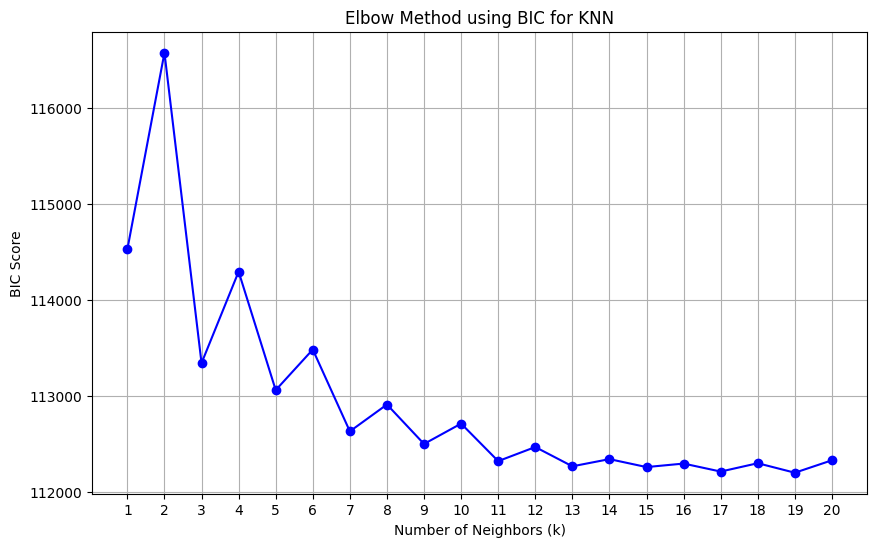

In [9]:
k_values = range(1, 21)  # Testing k from 1 to 20
bic_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Use cross-validation to calculate the average accuracy
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    
    # Calculate RSS (Residual Sum of Squares) as 1 - accuracy
    rss = (1 - scores.mean()) * len(X)
    
    # Calculate BIC
    n = len(X)
    bic = n * np.log(rss) + k * np.log(n)
    bic_scores.append(bic)

# Plot the BIC scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, bic_scores, marker='o', linestyle='-', color='b')
plt.title('Elbow Method using BIC for KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('BIC Score')
plt.xticks(k_values)
plt.grid()
plt.show()

In [10]:
knn = KNeighborsClassifier()

# Define hyperparameters to tune
param_grid = {
    'n_neighbors': [11],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Uniform or distance-based weighting
    'metric': ['euclidean', 'manhattan'],  # Distance metric
}

f1_scores = []
accuracy_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    print(f"Starting Bayes # {fold + 1}.")
    grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_knn = grid_search.best_estimator_
    y_pred_val = best_knn.predict(X_val)

    f1 = f1_score(y_val, y_pred_val, average='weighted')  # Use 'weighted' or adjust based on your data
    accuracy = accuracy_score(y_val, y_pred_val)

    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

foldScores['Bayes'] = {
    'F1-deviation': np.std(f1_scores),
    'F1-average': np.mean(f1_scores),
    'Accuracy-average': np.mean(accuracy_scores)
}
# Get Classification Report and Confusion Matrix only of last Fold
print(classification_report(y_val, y_pred_val))
print(confusion_matrix(y_val, y_pred_val))

Starting Bayes # 1.
Starting Bayes # 2.
Starting Bayes # 3.
Starting Bayes # 4.
Starting Bayes # 5.
              precision    recall  f1-score   support

       False       0.46      0.52      0.49       739
        True       0.81      0.78      0.79      2004

    accuracy                           0.71      2743
   macro avg       0.64      0.65      0.64      2743
weighted avg       0.72      0.71      0.71      2743

[[ 384  355]
 [ 449 1555]]


### Logistic Regression

In [12]:
log_regression = LogisticRegression(random_state=42)
param_grid = [
    # 'lbfgs' solver supports only 'l2'
    {'solver': ['lbfgs'], 
     'penalty': ['l2'], 
     'C': [0.1, 1, 10, 100], 
     'class_weight': [None, 'balanced']},

    # 'liblinear' solver supports 'l1' and 'l2'
    {'solver': ['liblinear'], 
     'penalty': ['l1', 'l2'], 
     'C': [0.1, 1, 10, 100], 
     'class_weight': [None, 'balanced']},

    # 'saga' solver supports 'l1', 'l2', and 'elasticnet'
    {'solver': ['saga'], 
     'penalty': ['l1', 'l2'], 
     'C': [0.1, 1, 10, 100], 
     'class_weight': [None, 'balanced']},
    
    # 'saga' solver with 'elasticnet'
    {'solver': ['saga'], 
     'penalty': ['elasticnet'], 
     'C': [0.1, 1, 10, 100], 
     'class_weight': [None, 'balanced'], 
     'l1_ratio': [0.5, 0.7, 0.9]}  # Elastic net-specific parameter
]

f1_scores = []
accuracy_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    print(f"Starting Log Regression # {fold + 1}.")
    grid_search = GridSearchCV(estimator=log_regression, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_log_regression = grid_search.best_estimator_
    y_pred_val = best_log_regression.predict(X_val)

    f1 = f1_score(y_val, y_pred_val, average='weighted')  # Use 'weighted' or adjust based on your data
    accuracy = accuracy_score(y_val, y_pred_val)

    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

foldScores['LogRegression'] = {
    'F1-deviation': np.std(f1_scores),
    'F1-average': np.mean(f1_scores),
    'Accuracy-average': np.mean(accuracy_scores)
}
# Get Classification Report and Confusion Matrix only of last Fold
print(classification_report(y_val, y_pred_val))
print(confusion_matrix(y_val, y_pred_val))

Starting Log Regression # 1.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Starting Log Regression # 2.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Starting Log Regression # 3.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Starting Log Regression # 4.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Starting Log Regression # 5.
              precision    recall  f1-score   support

       False       0.50      0.07      0.13       739
        True       0.74      0.97      0.84      2004

    accuracy                           0.73      2743
   macro avg       0.62      0.52      0.48      2743
weighted avg       0.68      0.73      0.65      2743

[[  53  686]
 [  53 1951]]


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


### SCORES

In [13]:
foldScores

{'DTree': {'F1-deviation': 0.012873252777105163,
  'F1-average': 0.6964331099904786,
  'Accuracy-average': 0.6885406425473164},
 'RForest': {'F1-deviation': 0.009464845309737862,
  'F1-average': 0.7328138915184084,
  'Accuracy-average': 0.7354920130647957},
 'Bayes': {'F1-deviation': 0.008434601273334546,
  'F1-average': 0.7047492282392086,
  'Accuracy-average': 0.7004232347592441},
 'LogRegression': {'F1-deviation': 0.011533292993269053,
  'F1-average': 0.6336095839247203,
  'Accuracy-average': 0.7279088886739531}}

## Full - MultiClass Classification

Not Using SMOTE BECAUSE CLASSIFICATION ISN'T BINARY

In [17]:
df = pd.read_csv('./Data/DF.csv', index_col='PetID') # Classifications for generic DF with AdoptionSpeed as the target
#smote = SMOTE(sampling_strategy=0.8, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
X, y = df.drop(columns='AdoptionSpeed'), df['AdoptionSpeed']


foldScores = {}

In [18]:
dtree = tree.DecisionTreeClassifier(random_state=42)

dtree_param_grid = {
    'max_depth': [3,5,10,15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}

f1_scores = []
accuracy_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    #X_train, y_train = smote.fit_resample(X_train, y_train)
    
    print(f"Starting Decision Tree # {fold + 1}.")
    grid_search = GridSearchCV(estimator=dtree, param_grid=dtree_param_grid, cv=3, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_dtree = grid_search.best_estimator_
    y_pred_val = best_dtree.predict(X_val)

    f1 = f1_score(y_val, y_pred_val, average='weighted')  # Use 'weighted' or adjust based on your data
    accuracy = accuracy_score(y_val, y_pred_val)

    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

foldScores['DTree'] = {
    'F1-deviation': np.std(f1_scores),
    'F1-average': np.mean(f1_scores),
    'Accuracy-average': np.mean(accuracy_scores)
}
# Get Classification Report and Confusion Matrix only of last Fold
print(classification_report(y_val, y_pred_val))
print(confusion_matrix(y_val, y_pred_val))

Starting Decision Tree # 1.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan 

Starting Decision Tree # 2.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan n

Starting Decision Tree # 3.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan n

Starting Decision Tree # 4.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan 

Starting Decision Tree # 5.
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        77
           1       0.24      0.16      0.19       560
           2       0.33      0.59      0.42       748
           3       0.26      0.02      0.04       619
           4       0.45      0.59      0.51       739

    accuracy                           0.36      2743
   macro avg       0.26      0.27      0.23      2743
weighted avg       0.32      0.36      0.30      2743

[[  0  11  42   4  20]
 [  0  89 346   7 118]
 [  0  91 443  13 201]
 [  0  84 327  13 195]
 [  0  96 192  13 438]]


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan 

- Random Forest

In [19]:
rforest = RandomForestClassifier(random_state=42)

param_grid = {
    'max_depth': [3,5,10,15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}

f1_scores = []
accuracy_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    #X_train, y_train = smote.fit_resample(X_train, y_train)
    
    print(f"Starting Decision Tree # {fold + 1}.")
    grid_search = GridSearchCV(estimator=rforest, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_rforest = grid_search.best_estimator_
    y_pred_val = best_rforest.predict(X_val)

    f1 = f1_score(y_val, y_pred_val, average='weighted')  # Use 'weighted' or adjust based on your data
    accuracy = accuracy_score(y_val, y_pred_val)

    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

foldScores['RForest'] = {
    'F1-deviation': np.std(f1_scores),
    'F1-average': np.mean(f1_scores),
    'Accuracy-average': np.mean(accuracy_scores)
}
# Get Classification Report and Confusion Matrix only of last Fold
print(classification_report(y_val, y_pred_val))
print(confusion_matrix(y_val, y_pred_val))

Starting Decision Tree # 1.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan n

Starting Decision Tree # 2.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan 

Starting Decision Tree # 3.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan 

Starting Decision Tree # 4.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan 

Starting Decision Tree # 5.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        77
           1       0.32      0.12      0.18       560
           2       0.32      0.59      0.42       748
           3       0.32      0.04      0.07       619
           4       0.44      0.64      0.52       739

    accuracy                           0.37      2743
   macro avg       0.28      0.28      0.24      2743
weighted avg       0.34      0.37      0.31      2743

[[  0  10  43   3  21]
 [  0  70 347   8 135]
 [  0  69 445  12 222]
 [  0  42 338  24 215]
 [  0  28 209  28 474]]


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


### Bayes

In [20]:
bayes = GaussianNB()
param_grid = {}

f1_scores = []
accuracy_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    #X_train, y_train = smote.fit_resample(X_train, y_train)
    
    print(f"Starting Bayes # {fold + 1}.")
    grid_search = GridSearchCV(estimator=bayes, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_bayes = grid_search.best_estimator_
    y_pred_val = best_bayes.predict(X_val)

    f1 = f1_score(y_val, y_pred_val, average='weighted')  # Use 'weighted' or adjust based on your data
    accuracy = accuracy_score(y_val, y_pred_val)

    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

foldScores['Bayes'] = {
    'F1-deviation': np.std(f1_scores),
    'F1-average': np.mean(f1_scores),
    'Accuracy-average': np.mean(accuracy_scores)
}
# Get Classification Report and Confusion Matrix only of last Fold
print(classification_report(y_val, y_pred_val))
print(confusion_matrix(y_val, y_pred_val))

c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(
c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


Starting Bayes # 1.
Starting Bayes # 2.
Starting Bayes # 3.
Starting Bayes # 4.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(
c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


Starting Bayes # 5.
              precision    recall  f1-score   support

           0       0.02      0.03      0.02        77
           1       0.27      0.44      0.34       560
           2       0.33      0.29      0.31       748
           3       0.34      0.17      0.23       619
           4       0.43      0.46      0.45       739

    accuracy                           0.33      2743
   macro avg       0.28      0.28      0.27      2743
weighted avg       0.34      0.33      0.33      2743

[[  2  39  12   8  16]
 [ 27 249 140  48  96]
 [ 23 246 220  78 181]
 [ 22 195 148 106 148]
 [ 15 181 137  68 338]]


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan]
  warnings.warn(


### KNN

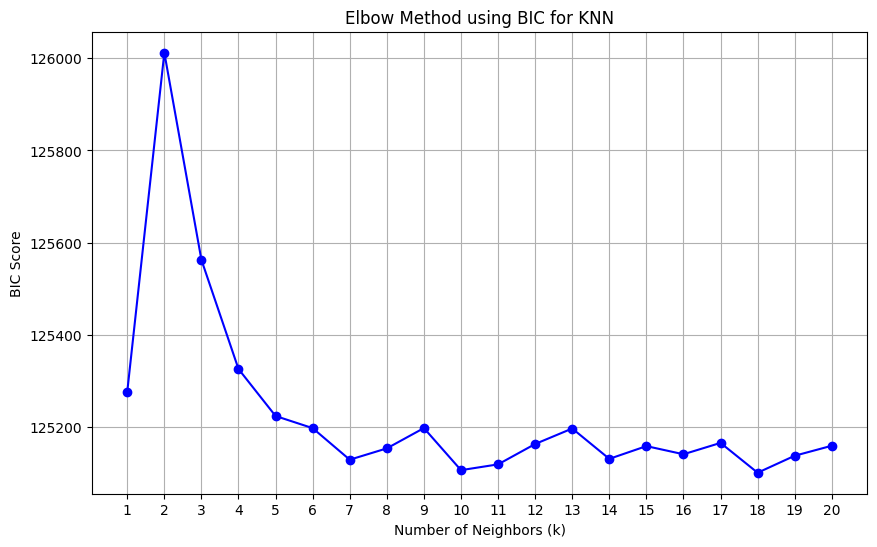

In [21]:
k_values = range(1, 21)  # Testing k from 1 to 20
bic_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Use cross-validation to calculate the average accuracy
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    
    # Calculate RSS (Residual Sum of Squares) as 1 - accuracy
    rss = (1 - scores.mean()) * len(X)
    
    # Calculate BIC
    n = len(X)
    bic = n * np.log(rss) + k * np.log(n)
    bic_scores.append(bic)

# Plot the BIC scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, bic_scores, marker='o', linestyle='-', color='b')
plt.title('Elbow Method using BIC for KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('BIC Score')
plt.xticks(k_values)
plt.grid()
plt.show()

In [25]:
knn = KNeighborsClassifier()

# Define hyperparameters to tune
param_grid = {
    'n_neighbors': [7],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Uniform or distance-based weighting
    'metric': ['euclidean', 'manhattan'],  # Distance metric
}

f1_scores = []
accuracy_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    #X_train, y_train = smote.fit_resample(X_train, y_train)
    
    print(f"Starting Bayes # {fold + 1}.")
    grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_knn = grid_search.best_estimator_
    y_pred_val = best_knn.predict(X_val)

    f1 = f1_score(y_val, y_pred_val, average='weighted')  # Use 'weighted' or adjust based on your data
    accuracy = accuracy_score(y_val, y_pred_val)

    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

foldScores['Bayes'] = {
    'F1-deviation': np.std(f1_scores),
    'F1-average': np.mean(f1_scores),
    'Accuracy-average': np.mean(accuracy_scores)
}
# Get Classification Report and Confusion Matrix only of last Fold
print(classification_report(y_val, y_pred_val))
print(confusion_matrix(y_val, y_pred_val))

Starting Bayes # 1.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(


Starting Bayes # 2.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(


Starting Bayes # 3.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(


Starting Bayes # 4.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(


Starting Bayes # 5.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan]
  warnings.warn(


              precision    recall  f1-score   support

           0       0.21      0.06      0.10        77
           1       0.29      0.39      0.33       560
           2       0.32      0.36      0.34       748
           3       0.32      0.24      0.27       619
           4       0.47      0.41      0.44       739

    accuracy                           0.34      2743
   macro avg       0.32      0.29      0.30      2743
weighted avg       0.35      0.34      0.34      2743

[[  5  30  23   5  14]
 [  3 219 194  73  71]
 [  4 213 273 121 137]
 [  6 146 200 146 121]
 [  6 148 169 115 301]]


### Logistic Regression

In [24]:
log_regression = LogisticRegression(random_state=42)
param_grid = [
    # 'lbfgs' solver supports only 'l2'
    {'solver': ['lbfgs'], 
     'penalty': ['l2'], 
     'C': [0.1, 1, 10, 100], 
     'class_weight': [None, 'balanced']},

    # 'liblinear' solver supports 'l1' and 'l2'
    {'solver': ['liblinear'], 
     'penalty': ['l1', 'l2'], 
     'C': [0.1, 1, 10, 100], 
     'class_weight': [None, 'balanced']},

    # 'saga' solver supports 'l1', 'l2', and 'elasticnet'
    {'solver': ['saga'], 
     'penalty': ['l1', 'l2'], 
     'C': [0.1, 1, 10, 100], 
     'class_weight': [None, 'balanced']},
    
    # 'saga' solver with 'elasticnet'
    {'solver': ['saga'], 
     'penalty': ['elasticnet'], 
     'C': [0.1, 1, 10, 100], 
     'class_weight': [None, 'balanced'], 
     'l1_ratio': [0.5, 0.7, 0.9]}  # Elastic net-specific parameter
]

f1_scores = []
accuracy_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    #X_train, y_train = smote.fit_resample(X_train, y_train)
    
    print(f"Starting Log Regression # {fold + 1}.")
    grid_search = GridSearchCV(estimator=log_regression, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_log_regression = grid_search.best_estimator_
    y_pred_val = best_log_regression.predict(X_val)

    f1 = f1_score(y_val, y_pred_val, average='weighted')  # Use 'weighted' or adjust based on your data
    accuracy = accuracy_score(y_val, y_pred_val)

    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

foldScores['LogRegression'] = {
    'F1-deviation': np.std(f1_scores),
    'F1-average': np.mean(f1_scores),
    'Accuracy-average': np.mean(accuracy_scores)
}
# Get Classification Report and Confusion Matrix only of last Fold
print(classification_report(y_val, y_pred_val))
print(confusion_matrix(y_val, y_pred_val))

Starting Log Regression # 1.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Starting Log Regression # 2.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Starting Log Regression # 3.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Starting Log Regression # 4.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Starting Log Regression # 5.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\model_selection\_search.py:1102: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        77
           1       0.32      0.09      0.14       560
           2       0.29      0.40      0.33       748
           3       0.24      0.02      0.04       619
           4       0.33      0.67      0.45       739

    accuracy                           0.31      2743
   macro avg       0.24      0.24      0.19      2743
weighted avg       0.29      0.31      0.25      2743

[[  0   3  43   3  28]
 [  0  52 264   7 237]
 [  0  47 299   6 396]
 [  0  32 246  12 329]
 [  0  28 191  22 498]]


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defin

In [26]:
foldScores

{'DTree': {'F1-deviation': 0.015600790235479004,
  'F1-average': 0.29598740017244235,
  'Accuracy-average': 0.36308002134242584},
 'RForest': {'F1-deviation': 0.010331811535774595,
  'F1-average': 0.2943165652971477,
  'Accuracy-average': 0.3667985776676172},
 'Bayes': {'F1-deviation': 0.006415885877924828,
  'F1-average': 0.33751651076322464,
  'Accuracy-average': 0.3395309449231492},
 'LogRegression': {'F1-deviation': 0.012902845297494626,
  'F1-average': 0.254329972858435,
  'Accuracy-average': 0.3165655434612781}}

## Cats - Binary Classification

In [27]:
df = pd.read_csv('./Data/BINARY-CATS.csv', index_col='PetID') # Classifications for generic DF with isPetAdopted as the target
smote = SMOTE(sampling_strategy=0.8, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
X, y = df.drop(columns='isPetAdopted'), df['isPetAdopted']


foldScores = {}

### Decision Tree

In [28]:
dtree = tree.DecisionTreeClassifier(random_state=42)

dtree_param_grid = {
    'max_depth': [3,5,10,15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}

f1_scores = []
accuracy_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    print(f"Starting Decision Tree # {fold + 1}.")
    grid_search = GridSearchCV(estimator=dtree, param_grid=dtree_param_grid, cv=3, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_dtree = grid_search.best_estimator_
    y_pred_val = best_dtree.predict(X_val)

    f1 = f1_score(y_val, y_pred_val, average='weighted')  # Use 'weighted' or adjust based on your data
    accuracy = accuracy_score(y_val, y_pred_val)

    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

foldScores['DTree'] = {
    'F1-deviation': np.std(f1_scores),
    'F1-average': np.mean(f1_scores),
    'Accuracy-average': np.mean(accuracy_scores)
}
# Get Classification Report and Confusion Matrix only of last Fold
print(classification_report(y_val, y_pred_val))
print(confusion_matrix(y_val, y_pred_val))

Starting Decision Tree # 1.
Starting Decision Tree # 2.
Starting Decision Tree # 3.
Starting Decision Tree # 4.
Starting Decision Tree # 5.
              precision    recall  f1-score   support

       False       0.38      0.44      0.41       301
        True       0.81      0.78      0.79       947

    accuracy                           0.69      1248
   macro avg       0.60      0.61      0.60      1248
weighted avg       0.71      0.69      0.70      1248

[[131 170]
 [213 734]]


### Random Forest

In [29]:
rforest = RandomForestClassifier(random_state=42)

param_grid = {
    'max_depth': [3,5,10,15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}

f1_scores = []
accuracy_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    print(f"Starting Decision Tree # {fold + 1}.")
    grid_search = GridSearchCV(estimator=rforest, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_rforest = grid_search.best_estimator_
    y_pred_val = best_rforest.predict(X_val)

    f1 = f1_score(y_val, y_pred_val, average='weighted')  # Use 'weighted' or adjust based on your data
    accuracy = accuracy_score(y_val, y_pred_val)

    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

foldScores['RForest'] = {
    'F1-deviation': np.std(f1_scores),
    'F1-average': np.mean(f1_scores),
    'Accuracy-average': np.mean(accuracy_scores)
}
# Get Classification Report and Confusion Matrix only of last Fold
print(classification_report(y_val, y_pred_val))
print(confusion_matrix(y_val, y_pred_val))

Starting Decision Tree # 1.
Starting Decision Tree # 2.
Starting Decision Tree # 3.
Starting Decision Tree # 4.
Starting Decision Tree # 5.
              precision    recall  f1-score   support

       False       0.49      0.46      0.48       301
        True       0.83      0.85      0.84       947

    accuracy                           0.76      1248
   macro avg       0.66      0.66      0.66      1248
weighted avg       0.75      0.76      0.75      1248

[[139 162]
 [143 804]]


### Bayes

In [30]:
bayes = GaussianNB()
param_grid = {}

f1_scores = []
accuracy_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    print(f"Starting Bayes # {fold + 1}.")
    grid_search = GridSearchCV(estimator=bayes, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_bayes = grid_search.best_estimator_
    y_pred_val = best_bayes.predict(X_val)

    f1 = f1_score(y_val, y_pred_val, average='weighted')  # Use 'weighted' or adjust based on your data
    accuracy = accuracy_score(y_val, y_pred_val)

    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

foldScores['Bayes'] = {
    'F1-deviation': np.std(f1_scores),
    'F1-average': np.mean(f1_scores),
    'Accuracy-average': np.mean(accuracy_scores)
}
# Get Classification Report and Confusion Matrix only of last Fold
print(classification_report(y_val, y_pred_val))
print(confusion_matrix(y_val, y_pred_val))

Starting Bayes # 1.
Starting Bayes # 2.
Starting Bayes # 3.
Starting Bayes # 4.
Starting Bayes # 5.
              precision    recall  f1-score   support

       False       0.30      0.64      0.41       301
        True       0.82      0.53      0.65       947

    accuracy                           0.56      1248
   macro avg       0.56      0.59      0.53      1248
weighted avg       0.70      0.56      0.59      1248

[[193 108]
 [443 504]]


### KNN

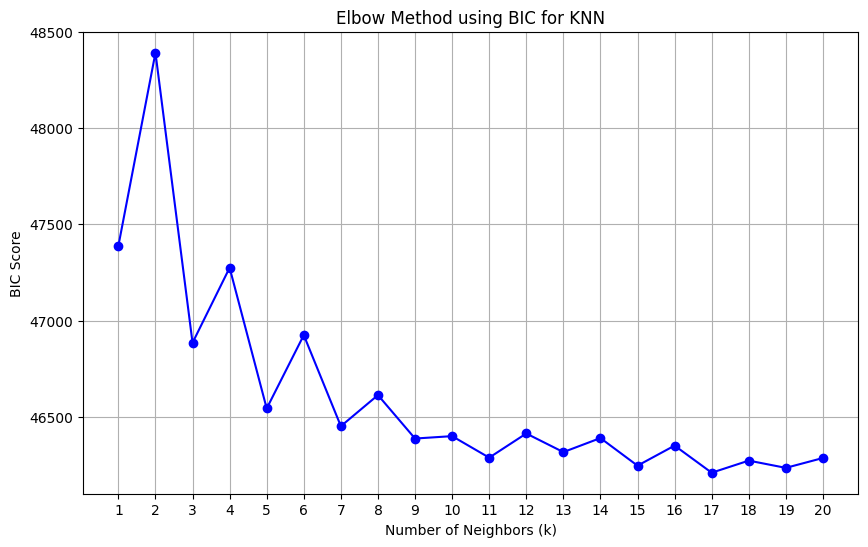

In [31]:
k_values = range(1, 21)  # Testing k from 1 to 20
bic_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Use cross-validation to calculate the average accuracy
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    
    # Calculate RSS (Residual Sum of Squares) as 1 - accuracy
    rss = (1 - scores.mean()) * len(X)
    
    # Calculate BIC
    n = len(X)
    bic = n * np.log(rss) + k * np.log(n)
    bic_scores.append(bic)

# Plot the BIC scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, bic_scores, marker='o', linestyle='-', color='b')
plt.title('Elbow Method using BIC for KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('BIC Score')
plt.xticks(k_values)
plt.grid()
plt.show()
knn = KNeighborsClassifier()

In [32]:
# Define hyperparameters to tune
param_grid = {
    'n_neighbors': [11],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Uniform or distance-based weighting
    'metric': ['euclidean', 'manhattan'],  # Distance metric
}

f1_scores = []
accuracy_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    print(f"Starting Bayes # {fold + 1}.")
    grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_knn = grid_search.best_estimator_
    y_pred_val = best_knn.predict(X_val)

    f1 = f1_score(y_val, y_pred_val, average='weighted')  # Use 'weighted' or adjust based on your data
    accuracy = accuracy_score(y_val, y_pred_val)

    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

foldScores['Bayes'] = {
    'F1-deviation': np.std(f1_scores),
    'F1-average': np.mean(f1_scores),
    'Accuracy-average': np.mean(accuracy_scores)
}
# Get Classification Report and Confusion Matrix only of last Fold
print(classification_report(y_val, y_pred_val))
print(confusion_matrix(y_val, y_pred_val))

Starting Bayes # 1.
Starting Bayes # 2.
Starting Bayes # 3.
Starting Bayes # 4.
Starting Bayes # 5.
              precision    recall  f1-score   support

       False       0.43      0.50      0.47       301
        True       0.83      0.79      0.81       947

    accuracy                           0.72      1248
   macro avg       0.63      0.65      0.64      1248
weighted avg       0.74      0.72      0.73      1248

[[152 149]
 [199 748]]


### Logistic Regression

In [33]:
log_regression = LogisticRegression(random_state=42)
param_grid = [
    # 'lbfgs' solver supports only 'l2'
    {'solver': ['lbfgs'], 
     'penalty': ['l2'], 
     'C': [0.1, 1, 10, 100], 
     'class_weight': [None, 'balanced']},

    # 'liblinear' solver supports 'l1' and 'l2'
    {'solver': ['liblinear'], 
     'penalty': ['l1', 'l2'], 
     'C': [0.1, 1, 10, 100], 
     'class_weight': [None, 'balanced']},

    # 'saga' solver supports 'l1', 'l2', and 'elasticnet'
    {'solver': ['saga'], 
     'penalty': ['l1', 'l2'], 
     'C': [0.1, 1, 10, 100], 
     'class_weight': [None, 'balanced']},
    
    # 'saga' solver with 'elasticnet'
    {'solver': ['saga'], 
     'penalty': ['elasticnet'], 
     'C': [0.1, 1, 10, 100], 
     'class_weight': [None, 'balanced'], 
     'l1_ratio': [0.5, 0.7, 0.9]}  # Elastic net-specific parameter
]

f1_scores = []
accuracy_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    print(f"Starting Log Regression # {fold + 1}.")
    grid_search = GridSearchCV(estimator=log_regression, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_log_regression = grid_search.best_estimator_
    y_pred_val = best_log_regression.predict(X_val)

    f1 = f1_score(y_val, y_pred_val, average='weighted')  # Use 'weighted' or adjust based on your data
    accuracy = accuracy_score(y_val, y_pred_val)

    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

foldScores['LogRegression'] = {
    'F1-deviation': np.std(f1_scores),
    'F1-average': np.mean(f1_scores),
    'Accuracy-average': np.mean(accuracy_scores)
}
# Get Classification Report and Confusion Matrix only of last Fold
print(classification_report(y_val, y_pred_val))
print(confusion_matrix(y_val, y_pred_val))

Starting Log Regression # 1.
Starting Log Regression # 2.
Starting Log Regression # 3.
Starting Log Regression # 4.
Starting Log Regression # 5.
              precision    recall  f1-score   support

       False       0.38      0.40      0.39       301
        True       0.81      0.79      0.80       947

    accuracy                           0.70      1248
   macro avg       0.59      0.60      0.60      1248
weighted avg       0.70      0.70      0.70      1248

[[121 180]
 [196 751]]


## Dogs - Binary Classification

In [34]:
df = pd.read_csv('./Data/BINARY-DOGS.csv', index_col='PetID') # Classifications for generic DF with isPetAdopted as the target
smote = SMOTE(sampling_strategy=0.8, random_state=42)

kf = KFold(n_splits=5, shuffle=True, random_state=42)
X, y = df.drop(columns='isPetAdopted'), df['isPetAdopted']


foldScores = {}

### Decision Tree

In [35]:
dtree = tree.DecisionTreeClassifier(random_state=42)

dtree_param_grid = {
    'max_depth': [3,5,10,15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}

f1_scores = []
accuracy_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    print(f"Starting Decision Tree # {fold + 1}.")
    grid_search = GridSearchCV(estimator=dtree, param_grid=dtree_param_grid, cv=3, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_dtree = grid_search.best_estimator_
    y_pred_val = best_dtree.predict(X_val)

    f1 = f1_score(y_val, y_pred_val, average='weighted')  # Use 'weighted' or adjust based on your data
    accuracy = accuracy_score(y_val, y_pred_val)

    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

foldScores['DTree'] = {
    'F1-deviation': np.std(f1_scores),
    'F1-average': np.mean(f1_scores),
    'Accuracy-average': np.mean(accuracy_scores)
}
# Get Classification Report and Confusion Matrix only of last Fold
print(classification_report(y_val, y_pred_val))
print(confusion_matrix(y_val, y_pred_val))

Starting Decision Tree # 1.
Starting Decision Tree # 2.
Starting Decision Tree # 3.
Starting Decision Tree # 4.
Starting Decision Tree # 5.
              precision    recall  f1-score   support

       False       0.56      0.50      0.53       438
        True       0.80      0.84      0.82      1057

    accuracy                           0.74      1495
   macro avg       0.68      0.67      0.67      1495
weighted avg       0.73      0.74      0.73      1495

[[217 221]
 [168 889]]


### Random Forest

In [36]:
rforest = RandomForestClassifier(random_state=42)

param_grid = {
    'max_depth': [3,5,10,15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
    'max_features': [None, 'sqrt', 'log2']
}

f1_scores = []
accuracy_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    print(f"Starting Decision Tree # {fold + 1}.")
    grid_search = GridSearchCV(estimator=rforest, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_rforest = grid_search.best_estimator_
    y_pred_val = best_rforest.predict(X_val)

    f1 = f1_score(y_val, y_pred_val, average='weighted')  # Use 'weighted' or adjust based on your data
    accuracy = accuracy_score(y_val, y_pred_val)

    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

foldScores['RForest'] = {
    'F1-deviation': np.std(f1_scores),
    'F1-average': np.mean(f1_scores),
    'Accuracy-average': np.mean(accuracy_scores)
}
# Get Classification Report and Confusion Matrix only of last Fold
print(classification_report(y_val, y_pred_val))
print(confusion_matrix(y_val, y_pred_val))

Starting Decision Tree # 1.
Starting Decision Tree # 2.
Starting Decision Tree # 3.
Starting Decision Tree # 4.
Starting Decision Tree # 5.
              precision    recall  f1-score   support

       False       0.59      0.55      0.57       438
        True       0.82      0.84      0.83      1057

    accuracy                           0.75      1495
   macro avg       0.70      0.69      0.70      1495
weighted avg       0.75      0.75      0.75      1495

[[240 198]
 [170 887]]


### Bayes

In [37]:
bayes = GaussianNB()
param_grid = {}

f1_scores = []
accuracy_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    print(f"Starting Bayes # {fold + 1}.")
    grid_search = GridSearchCV(estimator=bayes, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_bayes = grid_search.best_estimator_
    y_pred_val = best_bayes.predict(X_val)

    f1 = f1_score(y_val, y_pred_val, average='weighted')  # Use 'weighted' or adjust based on your data
    accuracy = accuracy_score(y_val, y_pred_val)

    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

foldScores['Bayes'] = {
    'F1-deviation': np.std(f1_scores),
    'F1-average': np.mean(f1_scores),
    'Accuracy-average': np.mean(accuracy_scores)
}
# Get Classification Report and Confusion Matrix only of last Fold
print(classification_report(y_val, y_pred_val))
print(confusion_matrix(y_val, y_pred_val))

Starting Bayes # 1.
Starting Bayes # 2.
Starting Bayes # 3.
Starting Bayes # 4.
Starting Bayes # 5.
              precision    recall  f1-score   support

       False       0.37      0.69      0.48       438
        True       0.80      0.52      0.63      1057

    accuracy                           0.57      1495
   macro avg       0.59      0.60      0.56      1495
weighted avg       0.68      0.57      0.59      1495

[[303 135]
 [512 545]]


### KNN

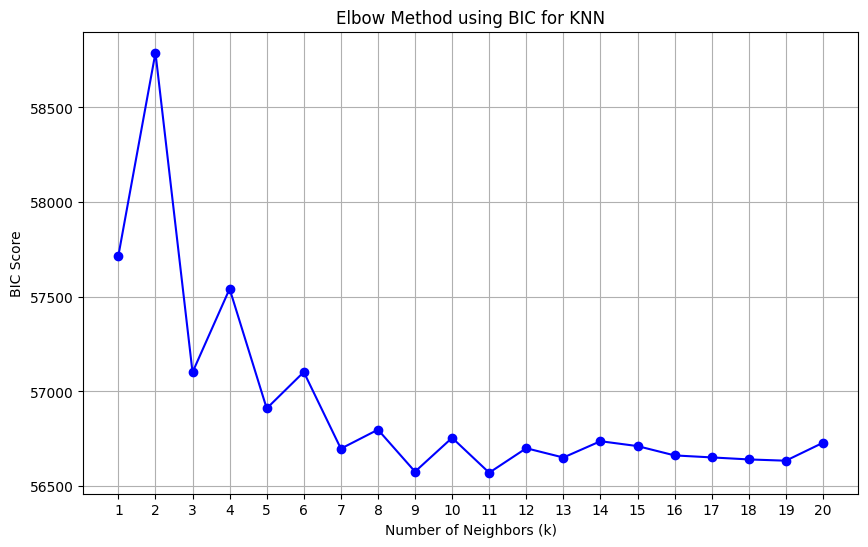

In [38]:
k_values = range(1, 21)  # Testing k from 1 to 20
bic_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Use cross-validation to calculate the average accuracy
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    
    # Calculate RSS (Residual Sum of Squares) as 1 - accuracy
    rss = (1 - scores.mean()) * len(X)
    
    # Calculate BIC
    n = len(X)
    bic = n * np.log(rss) + k * np.log(n)
    bic_scores.append(bic)

# Plot the BIC scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, bic_scores, marker='o', linestyle='-', color='b')
plt.title('Elbow Method using BIC for KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('BIC Score')
plt.xticks(k_values)
plt.grid()
plt.show()

In [39]:
knn = KNeighborsClassifier()
# Define hyperparameters to tune
param_grid = {
    'n_neighbors': [11],  # Number of neighbors
    'weights': ['uniform', 'distance'],  # Uniform or distance-based weighting
    'metric': ['euclidean', 'manhattan'],  # Distance metric
}

f1_scores = []
accuracy_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    print(f"Starting Bayes # {fold + 1}.")
    grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_knn = grid_search.best_estimator_
    y_pred_val = best_knn.predict(X_val)

    f1 = f1_score(y_val, y_pred_val, average='weighted')  # Use 'weighted' or adjust based on your data
    accuracy = accuracy_score(y_val, y_pred_val)

    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

foldScores['Bayes'] = {
    'F1-deviation': np.std(f1_scores),
    'F1-average': np.mean(f1_scores),
    'Accuracy-average': np.mean(accuracy_scores)
}
# Get Classification Report and Confusion Matrix only of last Fold
print(classification_report(y_val, y_pred_val))
print(confusion_matrix(y_val, y_pred_val))

Starting Bayes # 1.
Starting Bayes # 2.
Starting Bayes # 3.
Starting Bayes # 4.
Starting Bayes # 5.
              precision    recall  f1-score   support

       False       0.51      0.52      0.52       438
        True       0.80      0.79      0.80      1057

    accuracy                           0.71      1495
   macro avg       0.66      0.66      0.66      1495
weighted avg       0.72      0.71      0.72      1495

[[229 209]
 [218 839]]


### Logistic Regression

In [40]:
log_regression = LogisticRegression(random_state=42)
param_grid = [
    # 'lbfgs' solver supports only 'l2'
    {'solver': ['lbfgs'], 
     'penalty': ['l2'], 
     'C': [0.1, 1, 10, 100], 
     'class_weight': [None, 'balanced']},

    # 'liblinear' solver supports 'l1' and 'l2'
    {'solver': ['liblinear'], 
     'penalty': ['l1', 'l2'], 
     'C': [0.1, 1, 10, 100], 
     'class_weight': [None, 'balanced']},

    # 'saga' solver supports 'l1', 'l2', and 'elasticnet'
    {'solver': ['saga'], 
     'penalty': ['l1', 'l2'], 
     'C': [0.1, 1, 10, 100], 
     'class_weight': [None, 'balanced']},
    
    # 'saga' solver with 'elasticnet'
    {'solver': ['saga'], 
     'penalty': ['elasticnet'], 
     'C': [0.1, 1, 10, 100], 
     'class_weight': [None, 'balanced'], 
     'l1_ratio': [0.5, 0.7, 0.9]}  # Elastic net-specific parameter
]

f1_scores = []
accuracy_scores = []

for fold, (train_index, val_index) in enumerate(kf.split(X)):
    X_train, X_val = X.iloc[train_index], X.iloc[val_index]
    y_train, y_val = y.iloc[train_index], y.iloc[val_index]
    X_train, y_train = smote.fit_resample(X_train, y_train)
    
    print(f"Starting Log Regression # {fold + 1}.")
    grid_search = GridSearchCV(estimator=log_regression, param_grid=param_grid, cv=3, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_log_regression = grid_search.best_estimator_
    y_pred_val = best_log_regression.predict(X_val)

    f1 = f1_score(y_val, y_pred_val, average='weighted')  # Use 'weighted' or adjust based on your data
    accuracy = accuracy_score(y_val, y_pred_val)

    f1_scores.append(f1)
    accuracy_scores.append(accuracy)

foldScores['LogRegression'] = {
    'F1-deviation': np.std(f1_scores),
    'F1-average': np.mean(f1_scores),
    'Accuracy-average': np.mean(accuracy_scores)
}
# Get Classification Report and Confusion Matrix only of last Fold
print(classification_report(y_val, y_pred_val))
print(confusion_matrix(y_val, y_pred_val))

Starting Log Regression # 1.


c:\Users\duart\miniconda3\envs\churn\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Starting Log Regression # 2.
Starting Log Regression # 3.
Starting Log Regression # 4.
Starting Log Regression # 5.
              precision    recall  f1-score   support

       False       0.46      0.47      0.47       438
        True       0.78      0.78      0.78      1057

    accuracy                           0.69      1495
   macro avg       0.62      0.62      0.62      1495
weighted avg       0.69      0.69      0.69      1495

[[205 233]
 [237 820]]


In [41]:
foldScores

{'DTree': {'F1-deviation': 0.011203405566660085,
  'F1-average': 0.7223658927342644,
  'Accuracy-average': 0.7212421976999981},
 'RForest': {'F1-deviation': 0.006643697286477211,
  'F1-average': 0.7408105883791329,
  'Accuracy-average': 0.7418400908554361},
 'Bayes': {'F1-deviation': 0.003989061148207764,
  'F1-average': 0.7191693382353204,
  'Accuracy-average': 0.7176302469908609},
 'LogRegression': {'F1-deviation': 0.007194568184802757,
  'F1-average': 0.6805826577354176,
  'Accuracy-average': 0.6789710800708242}}